# Sportify like Recommander System

Music recommender systems (MRS) have recently exploded in popularity. Thanks to music streaming services like Spotify, Pandora and Apple Music. By some accounts, almost half of all current music consumption is by the way of these services. While recommender systems have been around for quite some time and are very well researched, music recommender systems differ from their more common siblings in some characteristically important ways: the duration of the items is less (3-5 min for a song vs 90 minutes for a movie or months/years for a book or shopping item), the size of the catalog of items is larger (10s of millions of songs), the items are consumed in sequence with multiple items consumed in a session, repeated recommendations have a different significance. Music Recommender Systems then require different approaches from traditional recommender systems.

## Project objective

* Objective of the project is to create a recommender system for automatic playlist continuation. 
* Given a set of playlist features, recommender systems should be able to generate a list of recommended tracks that can be added to that playlist, thereby ‘continuing’ the playlist.

## Approaches

1. __Non-Personalized Approaches:__ It includes recommending which is popular across the whole system. Simple and relatively easier to implement.
2. __Collaborative Filtering:__ Personalized recommendations, based on similarity between either users or items. User based CF assumes that users who behaved similarly (buying patterns, preference in movies or music, job application) in the past will behave similarly again in the future. 
3. __Content Based Filtering:__ The actual content of item refers to the actual characteristics of an item and these attributes are broken down into ‘tags’ and items are then matched to user preferences (as modelled by the tags) accordingly.

### Dataset used: [Millionsongdataset](http://millionsongdataset.com/)

* We have used a part of the dataset containing a subset of 2 Million songs which is also available in the above website.
* Necessary citation : [Bertin-Mahieux2011, ISMIR](http://www.columbia.edu/~tb2332/Papers/ismir11.pdf)

#### Knowledge

* [How Does Spotify Know You So Well?](https://medium.com/s/story/spotifys-discover-weekly-how-machine-learning-finds-your-new-music-19a41ab76efe)
* [mintabh](https://github.com/mrthlinh/Spotify-Playlist-Recommender)
* [Akaike](https://towardsdatascience.com/create-music-recommendation-system-using-python-ce5401317159)
* [Datacamp tutorial](https://www.datacamp.com/community/tutorials/recommender-systems-python)

In [52]:
# importing the essential libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import time
from sklearn.externals import joblib
import reco.Recommenders as Recommenders
import reco.Evaluation as Evaluation

In [57]:
# downloading the file from the source code directly 
# Using seperator to maintain spacing between the file. 

triplets_file = 'https://static.turi.com/datasets/millionsong/10000.txt'
songs_metadata_file = 'https://static.turi.com/datasets/millionsong/song_data.csv'

In [58]:
# Reading the csv file and seperating the columns using space.

song_df_1 = pd.read_csv(triplets_file, header=None, sep = "\t")

In [160]:
# creating the triplet: user id, song_id, and listened count.

song_df_1.columns = ['user_id', 'song_id', 'listen_count']
song_df_1.columns = ['user_id', 'song_id', 'listen_count']
song_df_1.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [60]:
# Now reading this file containing information about the song, and then merging the two files together.

song_df_2 =  pd.read_csv(songs_metadata_file)
song_df = pd.merge(song_df_1, song_df_2.drop_duplicates(['song_id']), on="song_id", how="left")

### This is what our entire dataset look like. 

In [62]:
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


####  Length of the entire subset
 * We see that the subset is too big to deal with, so
 * Reducing the subset into first 10K songs

In [63]:
len(song_df)

2000000

In [80]:
# Creating a subset of 10K songs
song_df = song_df.head(10000)
len(song_df)

10000

#### Creating the 'song' column, by merging

In [81]:
# Merge song title and artist_name columns to make a merged column

song_df['song'] = song_df['title'].map(str) + " - " + song_df['artist_name']

In [82]:
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly - Foo Fighters


#### Showing the most popular song in the dataset

Implementing this by first indentifying the highest count, then displaying in descending order of the highest count songs

In [83]:
song_grouped = song_df.groupby(['song']).agg({'listen_count': 'count'}).reset_index()
grouped_sum = song_grouped['listen_count'].sum()
song_grouped['percentage']  = song_grouped['listen_count'].div(grouped_sum)*100
song_grouped.sort_values(['listen_count', 'song'], ascending = [0,1])

,song,listen_count,percentage
3660,Sehr kosmisch - Harmonia,45,0.45
4678,Undo - Björk,32,0.32
5105,You're The One - Dwight Yoakam,32,0.32
1071,Dog Days Are Over (Radio Edit) - Florence + Th...,28,0.28
3655,Secrets - OneRepublic,28,0.28
...,...,...,...
5139,high fives - Four Tet,1,0.01
5140,in white rooms - Booka Shade,1,0.01
5143,paranoid android - Christopher O'Riley,1,0.01
5149,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,1,0.01


### The most important part of the ML models:
* Training dataset = 80%
* Testing dataset = 20%

In [84]:
 train_data, test_data = train_test_split(song_df, test_size = 0.20, random_state=0)
print(train_data.head())

                                       user_id             song_id  \
7389  94d5bdc37683950e90c56c9b32721edb5d347600  SOXNZOW12AB017F756   
9275  1012ecfd277b96487ed8357d02fa8326b13696a5  SOXHYVQ12AB0187949   
2995  15415fa2745b344bce958967c346f2a89f792f63  SOOSZAZ12A6D4FADF8   
5316  ffadf9297a99945c0513cd87939d91d8b602936b  SOWDJEJ12A8C1339FE   
356   5a905f000fc1ff3df7ca807d57edb608863db05d  SOAMPRJ12A8AE45F38   

      listen_count                 title  \
7389             2      Half Of My Heart   
9275             1  The Beautiful People   
2995             1     Sanctify Yourself   
5316             4     Heart Cooks Brain   
356             20                 Rorol   

                                                release      artist_name  \
7389                                     Battle Studies       John Mayer   
9275             Antichrist Superstar (Ecopac Explicit)   Marilyn Manson   
2995                             Glittering Prize 81/92     Simple Minds   
5316  Ever

In [89]:
# The number of unique users and unique songs
users = song_df['user_id'].unique()
songs = song_df['song'].unique()
print("UNIQUE USERS: ", len(users), "\n", "UNIQUE SONGS: ", len(songs))

UNIQUE USERS:  365 
 UNIQUE SONGS:  5151


In [87]:
# The number of unique songs

songs = song_df['song'].unique()
len(songs)

5151

####  Using borrowed module called Recommender from [dvysardana](https://github.com/dvysardana/RecommenderSystems_PyData_2016/blob/master/Recommenders.py). A description of the same can be found [here](https://goo.gl/ehBnhf)

This library contains classes for all the three different approaches mentioned in the first cell. 

### Popularity based recommander

Popularity based recommander system is often known as the __cold start__ or __non personalised recommandation__. In this particular type, all the users are recommanded the set of songs which are most popular throughout the system. The determining criterion can be the highest number of views of the song. This is the easiest to implement, and doesnot require to explore other dependencies.

In [108]:
def popularity_based_reco(nth_user):
    '''
    Provides recommendation for the nth user among 365 users
    
    Parameters:
    nth_user (int): Any user number between 0 to 364

    Returns:
    int: Returning popularity based recommendation for the user
    '''
    pm = Recommenders.popularity_recommender_py()
    pm.create(train_data, 'user_id', 'song')
    user_id = users[nth_user]
    return pm.recommend(user_id)

#### Note: The recommendation of any user is same. 

Try manipulating the numbers. And don't forget to check the docstring of the function, in case of any doubt. 

In [110]:
popularity_based_reco(364)

,user_id,song,score,Rank
3194,15cc706a7f24975ca831aaaf297bf0392746b3fe,Sehr kosmisch - Harmonia,37,1.0
4083,15cc706a7f24975ca831aaaf297bf0392746b3fe,Undo - Björk,27,2.0
931,15cc706a7f24975ca831aaaf297bf0392746b3fe,Dog Days Are Over (Radio Edit) - Florence + Th...,24,3.0
4443,15cc706a7f24975ca831aaaf297bf0392746b3fe,You're The One - Dwight Yoakam,24,4.0
3034,15cc706a7f24975ca831aaaf297bf0392746b3fe,Revelry - Kings Of Leon,21,5.0
3189,15cc706a7f24975ca831aaaf297bf0392746b3fe,Secrets - OneRepublic,21,6.0
4112,15cc706a7f24975ca831aaaf297bf0392746b3fe,Use Somebody - Kings Of Leon,21,7.0
1207,15cc706a7f24975ca831aaaf297bf0392746b3fe,Fireflies - Charttraxx Karaoke,20,8.0
1577,15cc706a7f24975ca831aaaf297bf0392746b3fe,Hey_ Soul Sister - Train,19,9.0
1626,15cc706a7f24975ca831aaaf297bf0392746b3fe,Horn Concerto No. 4 in E flat K495: II. Romanc...,19,10.0


###  Item similarity based personalised recommander

This is also known as the __Collaborative Filtering__ which is based on similarity between items. 
It first trains the model with respect to the views of the particular user, and then recommends similar items to the user, depending on their choices. If any user is new to the system and has not viewed any song yet, he would be recommended using the popularity recomendation only, but the moment the user starts listening to song, item similarity based recommandation can be implimentated. 

__Note: The working of the recommender is like a black box for this notebook. The class can be found in the reco folder of this repository__

In [120]:
def item_similarity_based_reco(nth_user_or_songname):
    '''
    Provides collaborative filtering: item similarity based recommendation 
    for the nth user among 365 users. Also prints the test data set, 
    i.e. the songs viewed/liked by the user. 
    
    Parameters:
    nth_user (int/string): Any user number between 0 to 364 or song name.
    
    Returns:
    int: Returning item similarity based recommendation for the user
    '''
    is_model = Recommenders.item_similarity_recommender_py()
    is_model.create(train_data, 'user_id', 'song')
    
    if type(nth_user_or_songname) == int:
        user_id = users[nth_user_or_songname]
        user_items = is_model.get_user_items(user_id)
        #
        print("------------------------------------------------------------------------------------")
        print("Training data songs for the user userid: %s:" % user_id)
        print("------------------------------------------------------------------------------------")

        for user_item in user_items:
            print(user_item)

        print("----------------------------------------------------------------------")
        print("Recommendation process going on:")
        print("----------------------------------------------------------------------")

        #Recommend songs for the user using personalized model
        return is_model.recommend(user_id)
    else:
        return is_model.get_similar_items([nth_user_or_songname])

__Do not worry about the above code block, for understanding what the function does, press shift+tab to view the docstring of the function or use print(item_similarity_based_reco.____doc__)

#### Explore the item based similarity by chaning the function input between 0 to 364

In [121]:
item_similarity_based_reco(25)

------------------------------------------------------------------------------------
Training data songs for the user userid: 405d396ea64d75b5eaefaaf8ac836f45fa56af4d:
------------------------------------------------------------------------------------
Bring The Pain - Method Man
History - Mos Def / Talib Kweli
Down On The Corner - Creedence Clearwater Revival
California Dreamin' - The Mamas & The Papas
Emerge - Fischerspooner
So I Thought - Flyleaf
'Round Midnight - Miles Davis
In The Flesh - Blondie
Blue In Green - Miles Davis
Do We Need This? - Muse
Bonnie And Clyde - Brigitte Bardot / Serge Gainsbourg
Ciúmes Da Lua - João Pedro Pais
Yesterday Once More - Carpenters
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 13
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :380


,user_id,song,score,rank
0,405d396ea64d75b5eaefaaf8ac836f45fa56af4d,Ask Me No Questions - Johnny Thunders,0.051282,1
1,405d396ea64d75b5eaefaaf8ac836f45fa56af4d,Gloomy - Creedence Clearwater Revival,0.038462,2
2,405d396ea64d75b5eaefaaf8ac836f45fa56af4d,Messages - Xavier Rudd,0.038462,3
3,405d396ea64d75b5eaefaaf8ac836f45fa56af4d,Shining Star - Earth_ Wind & Fire,0.038462,4
4,405d396ea64d75b5eaefaaf8ac836f45fa56af4d,Precious - Depeche Mode,0.038462,5
5,405d396ea64d75b5eaefaaf8ac836f45fa56af4d,Such A Lovely Thing (Album version) - Devotchka,0.038462,6
6,405d396ea64d75b5eaefaaf8ac836f45fa56af4d,You Love Me (Album Version) - Devotchka,0.038462,7
7,405d396ea64d75b5eaefaaf8ac836f45fa56af4d,Twenty-Six Temptations (Album version) - Devot...,0.038462,8
8,405d396ea64d75b5eaefaaf8ac836f45fa56af4d,Call It Off (Album Version) - Tegan And Sara,0.038462,9
9,405d396ea64d75b5eaefaaf8ac836f45fa56af4d,Too Deep - Girl Talk,0.038462,10


#### Item similarity based recommendar can also be used to recomenr similar song if any song is provided to the function, provided that is in the training set. Example:

In [139]:
item_similarity_based_reco('Heartbreak Warfare - John Mayer')

no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :368


,user_id,song,score,rank
0,,Here Without You - 3 Doors Down,0.400000,1
1,,The Funeral (Album Version) - Band Of Horses,0.363636,2
2,,Love Story - Taylor Swift,0.357143,3
3,,Bleed It Out [Live At Milton Keynes] - Linkin ...,0.357143,4
4,,Lucky (Album Version) - Jason Mraz & Colbie Ca...,0.333333,5
5,,Ain't No Rest For The Wicked (Original Version...,0.333333,6
6,,Heads Will Roll - Yeah Yeah Yeahs,0.300000,7
7,,Half Of My Heart - John Mayer,0.300000,8
8,,Somebody To Love - Justin Bieber,0.294118,9
9,,Nothin' On You [feat. Bruno Mars] (Album Versi...,0.294118,10


### Quantitative assesment of the models

Two of the recommender system is already taken care of. Time for their assesment on the performance. 

In [144]:
pm = Recommenders.popularity_recommender_py()
pm.create(train_data, 'user_id', 'song')
user_id = users[25]

is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'user_id', 'song')

user_id = users[25]
user_items = is_model.get_user_items(user_id)

In [145]:
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Instantiate the precision_recall_calculator class
pr = Evaluation.precision_recall_calculator(test_data, train_data, pm, is_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:319
Length of user sample:15
Getting recommendations for user:8c0a675214831879573af98d632bf2684273e0d9
No. of unique songs for the user: 14
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :932
Getting recommendations for user:2aa3b8c9f60070025940183cdd44602086d7b535
No. of unique songs for the user: 23
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :3315
Getting recommendations for user:8814f5d1f1d7177aa2efb6de6454504f3bb7b7bc
No. of unique songs for the user: 5
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :741
Getting recommendations for user:1b96dd04ce96aa7995e0f817e762ca44a24aab24
No. of unique songs for the user: 27
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :3353
Getting recommendations for user:15415fa2745b344bce958967c346f2a89f792f63
No. of unique songs for the user: 34
no. of unique songs in the

### Plotting precision recall curve

In [146]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.20])
    pl.xlim([0.0, 0.20])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

Plotting precision recall curves.


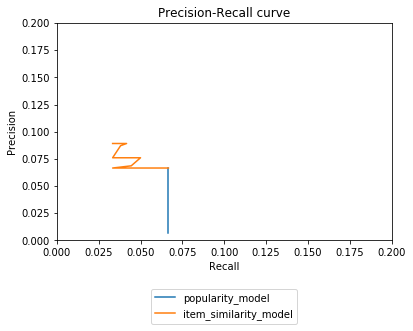

In [147]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

### Generate Precision Recall curve using pickled results on a larger data subset

Plotting precision recall curves for a larger subset of data (100,000 rows) (user sample = 0.005).
Plotting precision recall curves.


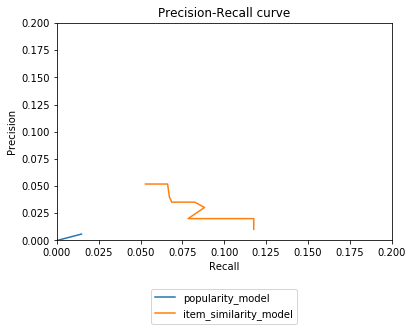

In [153]:
print("Plotting precision recall curves for a larger subset of data (100,000 rows) (user sample = 0.005).")

#Read the persisted files 
pm_avg_precision_list = joblib.load('reco/pm_avg_precision_list_3.pkl')
pm_avg_recall_list = joblib.load('reco/pm_avg_recall_list_3.pkl')
ism_avg_precision_list = joblib.load('reco/ism_avg_precision_list_3.pkl')
ism_avg_recall_list = joblib.load('reco/ism_avg_recall_list_3.pkl')

print("Plotting precision recall curves.")
plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

### Generate Precision Recall curve using pickled results on a larger data subset

Plotting precision recall curves for a larger subset of data (100,000 rows) (user sample = 0.005).
Plotting precision recall curves.


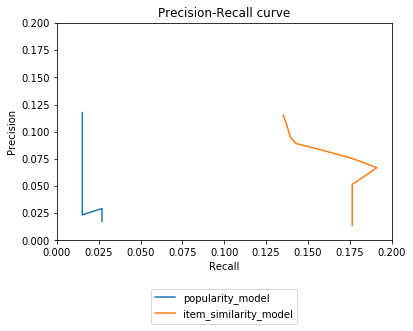

In [156]:
print("Plotting precision recall curves for a larger subset of data (100,000 rows) (user sample = 0.005).")

pm_avg_precision_list = joblib.load('reco/pm_avg_precision_list_2.pkl')
pm_avg_recall_list = joblib.load('reco/pm_avg_recall_list_2.pkl')
ism_avg_precision_list = joblib.load('reco/ism_avg_precision_list_2.pkl')
ism_avg_recall_list = joblib.load('reco/ism_avg_recall_list_2.pkl')

print("Plotting precision recall curves.")
plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

### Matrix Factorization based Recommender System

**Using SVD matrix factorization based collaborative filtering recommender system**


The following code implements a Singular Value Decomposition (SVD) based matrix factorization collaborative filtering recommender system. 
The user ratings matrix used is a small matrix as follows: 
Item0 Item1 Item2 Item3 User0 3 1 2 3 User1 4 3 4 3 User2 3 2 1 5 User3 1 6 5 2 User4 0 0 5 0 As we can see in the above matrix, all users except user 4 rate all items. The code calculates predicted recommendations for user 4.

__The intuition behind SVD__

SVD result gives three matrices as output: U, S and Vt (T in Vt means transpose). Matrix U represents user vectors and Matrix Vt represents item vectors. In simple terms, U represents users as 2 dimensional points in the latent vector space, and Vt represents items as 2 dimensional points in the same space. Next, we print the matrices U, S and Vt and try to interpret them. Think how the points for users and items will look like in a 2 dimensional axis. For example, the following code plots all user vectors from the matrix U in the 2 dimensional space. Similarly, we plot all the item vectors in the same plot from the matrix Vt.


In [159]:
# import math as mt
# import csv
# from sparsesvd import sparsesvd #used for matrix factorization
# import numpy as np
# from scipy.sparse import csc_matrix #used for sparse matrix
# from scipy.sparse.linalg import * #used for matrix multiplication